<a href="https://colab.research.google.com/github/yuyangweng/Deep_Learning_Ittraining/blob/main/AutoEncoder_v0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#使用NN實作AutoEncoder

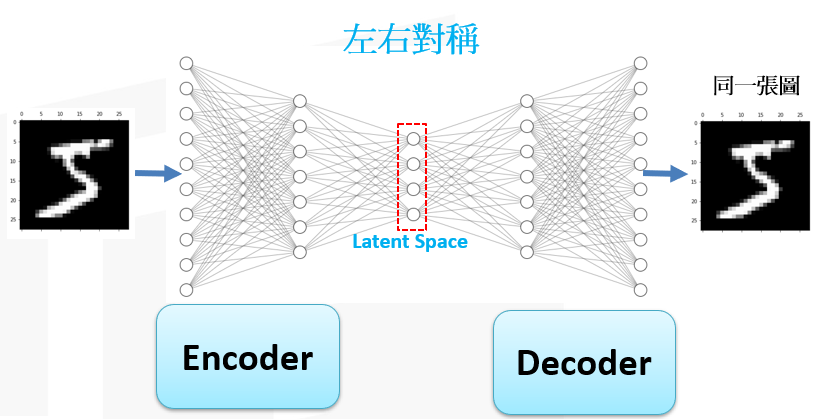

In [4]:
import tensorflow as tf
print(f"Tensorflow Version={tf.__version__}")

import tensorflow.keras
print(f"tensorflow.keras Version={tensorflow.keras.__version__}")

#載入Dataset
from tensorflow.keras import datasets

(X_train, y_train),(X_test, y_test)= datasets.mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), 784))
X_test = X_test.reshape((len(X_test), 784))
#建立Model
#建立輸入層
from tensorflow.keras import layers
from tensorflow.keras import models

#此例用三個模型來完成AutoEncoder是為了後續的VAE學習熟悉用！
#-------------Encoder-------------
from tensorflow.keras.layers import Input
input_layer = Input(shape=(28*28))

x=layers.Dense(units=128)(input_layer)
encoding_dim = 32
encoder_output=layers.Dense(units=encoding_dim,activation='sigmoid')(x)

model_encoder = models.Model(inputs=input_layer, outputs=encoder_output,name='model_encoder')

#-------------Decoder-------------
#此刻可見到用Functional Model的好處（因為能建立多個Input）
encoded_input = tensorflow.keras.Input(shape=(encoding_dim,))
x=layers.Dense(units=128)(encoded_input)
output_layer = layers.Dense(units=28*28)(x)

model_decoder = tensorflow.keras.Model(encoded_input, output_layer,name='model_decoder')

#-------------Autoencoder模型-------------
from tensorflow.keras.models import Model
model_autoencoder = Model(inputs=input_layer, outputs=model_decoder(model_encoder(input_layer)),name='model_autoencoder')

# 最佳化設定
model_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# 開始進行training
model_autoencoder.fit(
    x=X_train,
    y=X_train,
    epochs=1,
    verbose=1,
    batch_size=256,
    shuffle=True,
    validation_split=0.1
)
model_encoder.summary()
model_autoencoder.summary()
model_decoder.summary()



Tensorflow Version=2.5.0
tensorflow.keras Version=2.5.0
211/211 [==============================] - 4s 16ms/step - loss: 0.5495 - val_loss: 0.4670
Model: "model_encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
Total params: 104,608
Trainable params: 104,608
Non-trainable params: 0
_________________________________________________________________
Model: "model_autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
______

#實測第0張testing dataset圖

11493376/11490434 [==============================] - 0s 0us/step
y_train[0]=7
類別名稱為=7


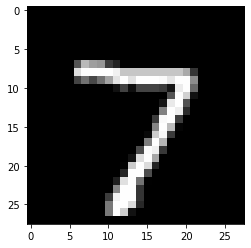

In [2]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train,y_train),(X_test,y_test)=mnist.load_data()
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(f'y_train[0]={y_test[0]}')
print(f'類別名稱為={classes[y_test[0]]}')
#顯示黑底白字
plt.imshow(X_test[0].reshape(28,28), cmap = plt.get_cmap('gray'))

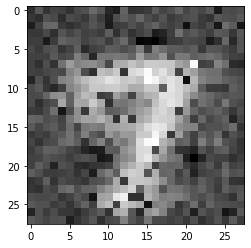

In [5]:

predict_images = model_autoencoder.predict(X_test.reshape(-1,784))
#顯示黑底白字
plt.imshow(predict_images[0].reshape(28,28), cmap = plt.get_cmap('gray'))

#再train個10 epoch

In [6]:
# 開始進行training
model_autoencoder.fit(
    x=X_train,
    y=X_train,
    epochs=10,
    verbose=1,
    batch_size=256,
    shuffle=True,
    validation_split=0.1
)

Epoch 1/10
211/211 [==============================] - 3s 16ms/step - loss: 0.4039 - val_loss: 0.3429
Epoch 2/10
211/211 [==============================] - 3s 15ms/step - loss: 0.3260 - val_loss: 0.3147
Epoch 3/10
211/211 [==============================] - 3s 16ms/step - loss: 0.2950 - val_loss: 0.2465
Epoch 4/10
211/211 [==============================] - 3s 16ms/step - loss: 0.2379 - val_loss: 0.2084
Epoch 5/10
211/211 [==============================] - 3s 15ms/step - loss: 0.2143 - val_loss: 0.2436
Epoch 6/10
211/211 [==============================] - 3s 15ms/step - loss: 0.2247 - val_loss: 0.2367
Epoch 7/10
211/211 [==============================] - 3s 15ms/step - loss: 0.2309 - val_loss: 0.2092
Epoch 8/10
211/211 [==============================] - 3s 16ms/step - loss: 0.2122 - val_loss: 0.2344
Epoch 9/10
211/211 [==============================] - 3s 15ms/step - loss: 0.2701 - val_loss: 0.2259
Epoch 10/10
211/211 [==============================] - 3s 16ms/step - loss: 0.2165 - val_lo

#實測第0張testing dataset圖

y_train[0]=7
類別名稱為=7


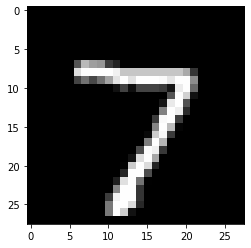

In [7]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(f'y_train[0]={y_test[0]}')
print(f'類別名稱為={classes[y_test[0]]}')
#顯示黑底白字
plt.imshow(X_test[0].reshape(28,28), cmap = plt.get_cmap('gray'))

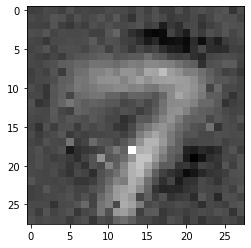

In [8]:
predict_images = model_autoencoder.predict(X_test.reshape(-1,784))
#顯示黑底白字
plt.imshow(predict_images[0].reshape(28,28), cmap = plt.get_cmap('gray'))

#再train個50 epoch

In [9]:
# 開始進行training
model_autoencoder.fit(
    x=X_train,
    y=X_train,
    epochs=50,
    verbose=1,
    batch_size=256,
    shuffle=True,
    validation_split=0.1
)

Epoch 1/50
211/211 [==============================] - 3s 16ms/step - loss: 0.2158 - val_loss: 0.2079
Epoch 2/50
211/211 [==============================] - 3s 15ms/step - loss: 0.1944 - val_loss: 0.1812
Epoch 3/50
211/211 [==============================] - 3s 15ms/step - loss: 0.1916 - val_loss: 0.1962
Epoch 4/50
211/211 [==============================] - 3s 15ms/step - loss: 0.1997 - val_loss: 0.1745
Epoch 5/50
211/211 [==============================] - 3s 16ms/step - loss: 0.1836 - val_loss: 0.1734
Epoch 6/50
211/211 [==============================] - 3s 16ms/step - loss: 0.1885 - val_loss: 0.2412
Epoch 7/50
211/211 [==============================] - 3s 15ms/step - loss: 0.1953 - val_loss: 0.2023
Epoch 8/50
211/211 [==============================] - 3s 15ms/step - loss: 0.2056 - val_loss: 0.2106
Epoch 9/50
211/211 [==============================] - 3s 15ms/step - loss: 0.1978 - val_loss: 0.1766
Epoch 10/50
211/211 [==============================] - 3s 15ms/step - loss: 0.1744 - val_lo

#實測第0張testing dataset圖

y_train[0]=7
類別名稱為=7


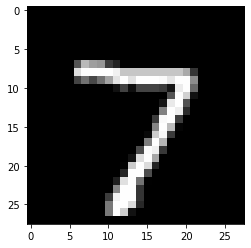

In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(f'y_train[0]={y_test[0]}')
print(f'類別名稱為={classes[y_test[0]]}')
#顯示黑底白字
plt.imshow(X_test[0].reshape(28,28), cmap = plt.get_cmap('gray'))

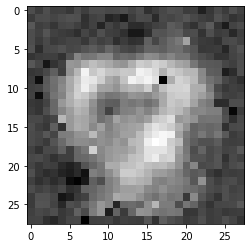

In [ ]:
predict_images = model_autoencoder.predict(X_test.reshape(-1,784))
#顯示黑底白字
plt.imshow(predict_images[0].reshape(28,28), cmap = plt.get_cmap('gray'))

#實測第1張testing dataset圖

y_train[1]=2
類別名稱為=2


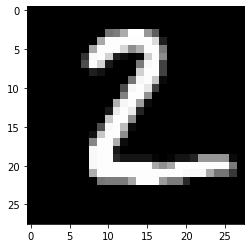

In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(f'y_train[1]={y_test[1]}')
print(f'類別名稱為={classes[y_test[1]]}')
#顯示黑底白字
plt.imshow(X_test[1].reshape(28,28), cmap = plt.get_cmap('gray'))

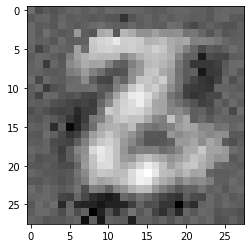

In [ ]:
predict_images = model_autoencoder.predict(X_test.reshape(-1,784))
#顯示黑底白字
plt.imshow(predict_images[1].reshape(28,28), cmap = plt.get_cmap('gray'))